In [1]:
import numpy as np

def sample(N, m, eps):
    # Sample N from two unit boxes ([0,1]^2 and [1+eps, 2 + eps]x[0, 1]), where the 2nd box has mx the density of the first box
    X = np.zeros((N, 2))
    for i in range(N):
        if np.random.random() < .2:
            X[i, :] = [np.random.random(), np.random.random()]
        else:
            X[i, :] = [np.random.random() + 1 + eps, np.random.random()]
    return X

In [ ]:
X = sample(200, 10, .5)
np.save('clusters.npy', X)

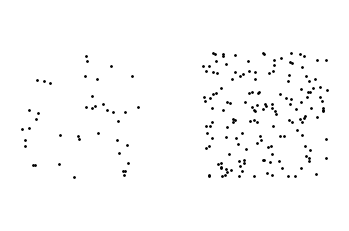

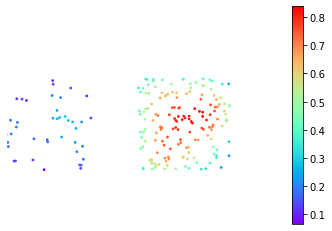

In [2]:
import matplotlib.pyplot as plt
import DVR

plt.axis('equal')
plt.axis('off')
X = np.load('clusters.npy')
plt.scatter(X[:, 0], X[:, 1], color = 'k', s = 3)
plt.show()
DVR.plot_density(X, 2)

Set k =  9


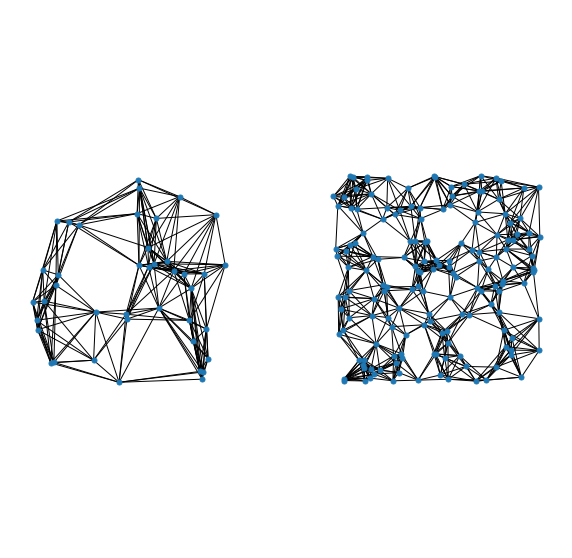

In [6]:
geo_est = DVR.Geodist_estimator(X, 2)
geo_est.plot_Gknn_unweighted()
geo_dist = geo_est.distance_matrix()

Set k =  9


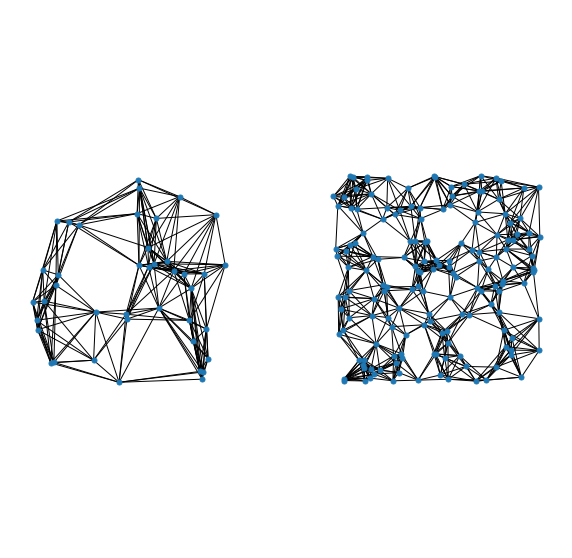

In [11]:
geo_est = DVR.Geodist_estimator(X, 2)
geo_est.plot_Gknn_unweighted()
geo_dist = geo_est.distance_matrix()

Number of infinite components:  2


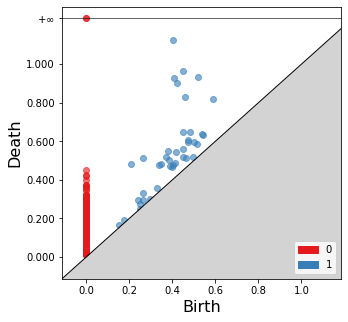

In [14]:
import gudhi as gd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5)
dvr = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
dvr_ph = dvr.persistence()
gd.plot_persistence_diagram(persistence = dvr_ph, legend = True)
plt.title("")

m = 0
for elt in dvr_ph:
    if elt == (0, (0, np.inf)):
        m+=1
print("Number of infinite components: ", m)

DVR: triweight

Set k =  9


usetex mode requires ghostscript.


Text(0.5, 1.0, '')

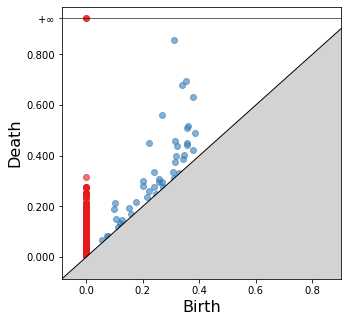

In [5]:
import DVR
import gudhi as gd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5)
triweight = DVR.DVR(1, points = X, kernel = DVR.f_estimator.triweight, max_dimension = 2)
triweight_ph = triweight.persistence()
gd.plot_persistence_diagram(persistence = triweight_ph)
plt.title("")

DVR: Epanechnikov kernel

Set k =  9


usetex mode requires ghostscript.


Text(0.5, 1.0, '')

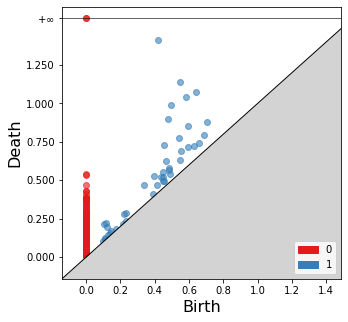

In [3]:
import DVR
import gudhi as gd

geo_cpx_ep = DVR.DVR(1, points = X, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

knn filtration

In [30]:
knnD = DVR.knn_distance(X)
knn_cpx = gd.RipsComplex(distance_matrix = knnD).create_simplex_tree(max_dimension = 2)
knn_ph = knn_cpx.persistence()
gd.plot_persistence_diagram(persistence = knn_ph, legend = True)
plt.title("")

Text(0.5, 1.0, '')

t =  0


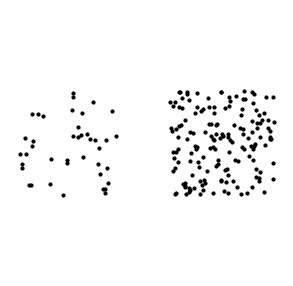

t =  10


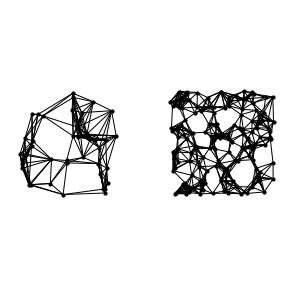

t =  20


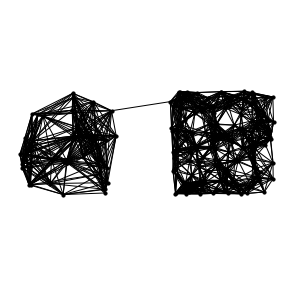

In [31]:
for t in range(0, 30, 10):
    print("t = ", t)
    DVR.plot_1skeleton(X, knnD, t)
    plt.axis('equal')
    plt.show()

Density-Weighted

Text(0.5, 1.0, '')

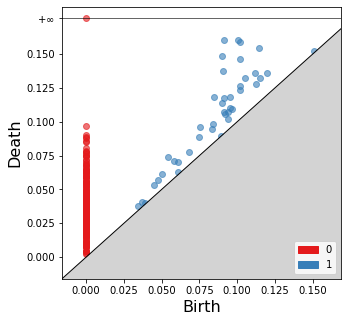

In [32]:
weighted = DVR.density_weighted(1, X, max_dimension = 2)
weighted_ph = weighted.persistence()
gd.plot_persistence_diagram(persistence = weighted_ph, legend = True)
plt.title("")

Vietoris Rips

In [33]:
vr = gd.RipsComplex(X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("")

Text(0.5, 1.0, '')

t =  0.0


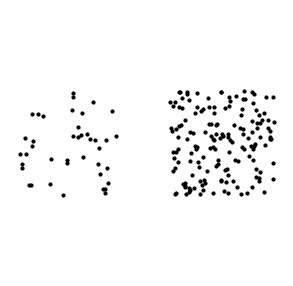

t =  0.3


t =  0.6


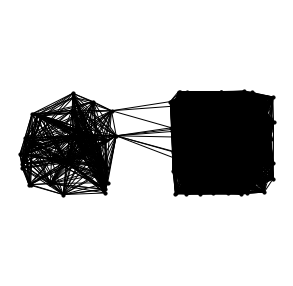

In [44]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
for t in np.arange(0, .7, .3):
    print("t = ", t)
    DVR.plot_1skeleton(X, squareform(pdist(X)), t)
    plt.show()